## Maximum margin classification with support vector machines

In SVMs, our optimization objective is to maximize the margin.The margin is defined as the distance between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane, which are the so-called support vectors.

In [1]:
# import dataset 

from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X = iris.data[:, [2, 3]]
y= iris.target

# splitting data to test performance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # stratification will ensure that both your training and testing sets maintain the same class distribution

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)                    # finding mean and std
X_train_std=sc.transform(X_train)  # using same mean std for train and test
X_test_std=sc.transform(X_test)

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers=('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap= ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision surface
    x1_min,x1_max=X[:,0].min()-1, X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1, X[:,1].max()+1

    xx1,xx2= np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y= X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                   marker=markers[idx],
                   label=f'Class{cl}', edgecolor='black')
    if test_idx:
        X_test, y_test= X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1],
                   c='none', edgecolors='black',alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

In [3]:
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train,y_test))

### Dealing with a nonlinearly separable case using slack variables



### The Idea of Maximum-Margin Classification
Imagine you're trying to draw a straight line that separates two groups of points on a piece of paper, like red and blue dots. The goal is to draw this line in such a way that it not only separates the two groups but also leaves the most space between the line and the nearest dots from each group. This space is called the "margin." The idea is that a bigger margin makes the separation more confident, meaning it's less likely to misclassify new dots.

#### What If the Dots Can't Be Separated by a Straight Line?
Now, sometimes the red and blue dots are so mixed up that it's impossible to separate them perfectly with a straight line. No matter where you draw the line, some dots will always be on the wrong side. This is where the concept of a "soft margin" comes in.

#### Enter the Slack Variable
The slack variable is like a little "wiggle room" we give to the line. Instead of being strict about keeping all red dots on one side and all blue dots on the other, we allow some dots to be on the wrong side but penalize this in the model.

<b>Hard Margin</b>: Imagine telling the line, "You must separate the dots perfectly, no matter what." This is only possible if the dots are neatly separated, which is often not the case.

<b>Soft Margin</b>: Now imagine saying, "It's okay if a few dots end up on the wrong side, as long as most are correctly separated and the margin is as large as possible." This makes the line more flexible and allows it to handle situations where perfect separation isn't possible.

#### Why Is This Useful?
By introducing this "wiggle room" (or slack variable), the model can still draw the best possible line, even when the dots are not perfectly separable. This helps the model to not overreact to every single dot that's in the wrong place. In other words, it focuses on finding a balance between separating the dots as well as possible and maintaining a wide margin.

So, the slack variable allows for a more practical and flexible way of drawing that separating line when perfect separation isn't possible. This concept of "soft margin" helps the model to generalize better to new, unseen data instead of being overly rigid and sensitive to every single point in the training data.

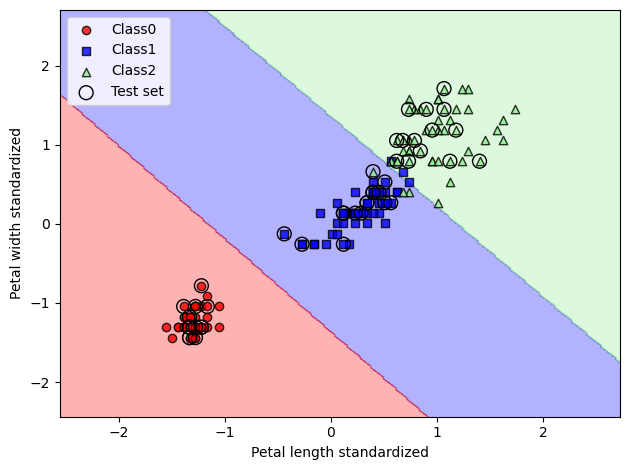

In [4]:
from sklearn.svm import SVC
svm= SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Petal length standardized')
plt.ylabel('Petal width standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Logistic regression. vs SVM

logistic is prone to outlier as it tries to maximise the conditional likelihood of the training data whereas SVM cares only about decision boundary closest point. 

### Solving nonlinear problems using a kernel SVM



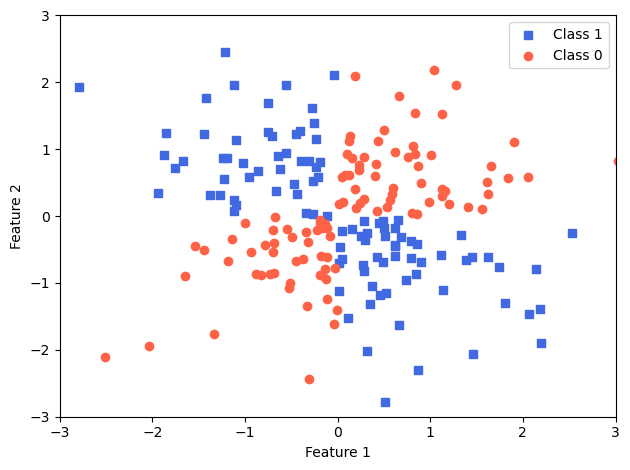

In [5]:
# code to create a non-linearly separable dataset
# create a simple dataset that has the form of an XOR gate using the logical_xor

np.random.seed(1)
X_xor= np.random.randn(200,2)
y_xor= np.logical_xor(X_xor[:,0]>0 , X_xor[:,1]>0)
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor==0,0], X_xor[y_xor==0, 1], c='tomato', marker='o', label='Class 0')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Using the kernel trick to find separating hyperplanes in a high-dimensional space


One of the most widely used kernels is the radial basis function (RBF) kernel, which can simply be called the Gaussian kernel:
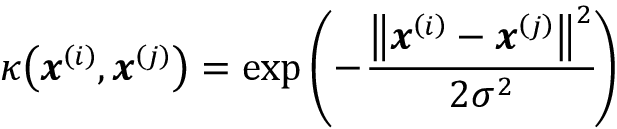

The minus sign in the formula ensures that as the distance between two points increases, the similarity score decreases.

the term “kernel” can be interpreted as a similarity function between a pair of examples

#### Kernel Trick:

The kernel trick is a mathematical shortcut that allows us to operate in the high-dimensional space without actually computing the new coordinates of the data in that space.

Instead of explicitly mapping data to a higher dimension, we use a function (kernel function) to compute the similarity between pairs of data points directly in the original space.



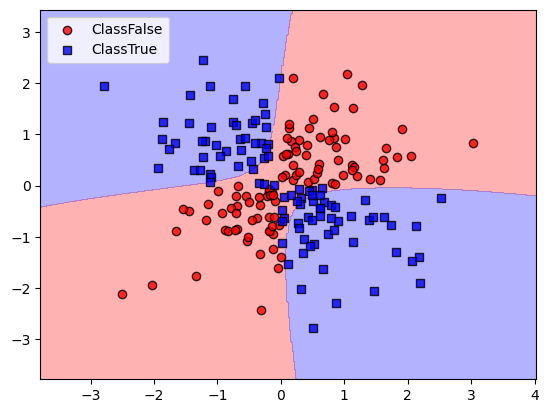

In [8]:
svm= SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) # gamma is basically 1/2sigma_square. its a free parameter to be optimised. Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()


The gamma parameter acts like a cut-off for how much influence each data point has on the model's decision boundary. A low gamma allows the model to look at the big picture (a wide view), while a high gamma makes the model focus on the details (a narrow view).

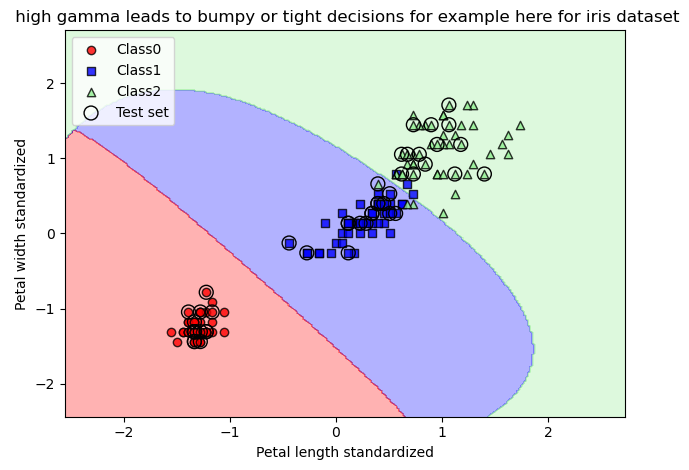

In [13]:

svm= SVC(kernel='rbf', gamma=0.3, C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Petal length standardized')
plt.ylabel('Petal width standardized')
plt.legend(loc='upper left')
plt.title(' high gamma leads to bumpy or tight decisions for example here for iris dataset')
plt.tight_layout()
plt.show()

Choosing the right value of gamma is important for balancing between overfitting and underfitting, and it often requires experimentation or cross-validation.